## <font color=#00008b>數據載入</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from PIL import Image
Img = Image.open('New York City Airbnb Open Data/New_York_City_.png')

data = pd.read_csv('New York City Airbnb Open Data/AB_NYC_2019.csv')

pd.options.mode.chained_assignment = None 

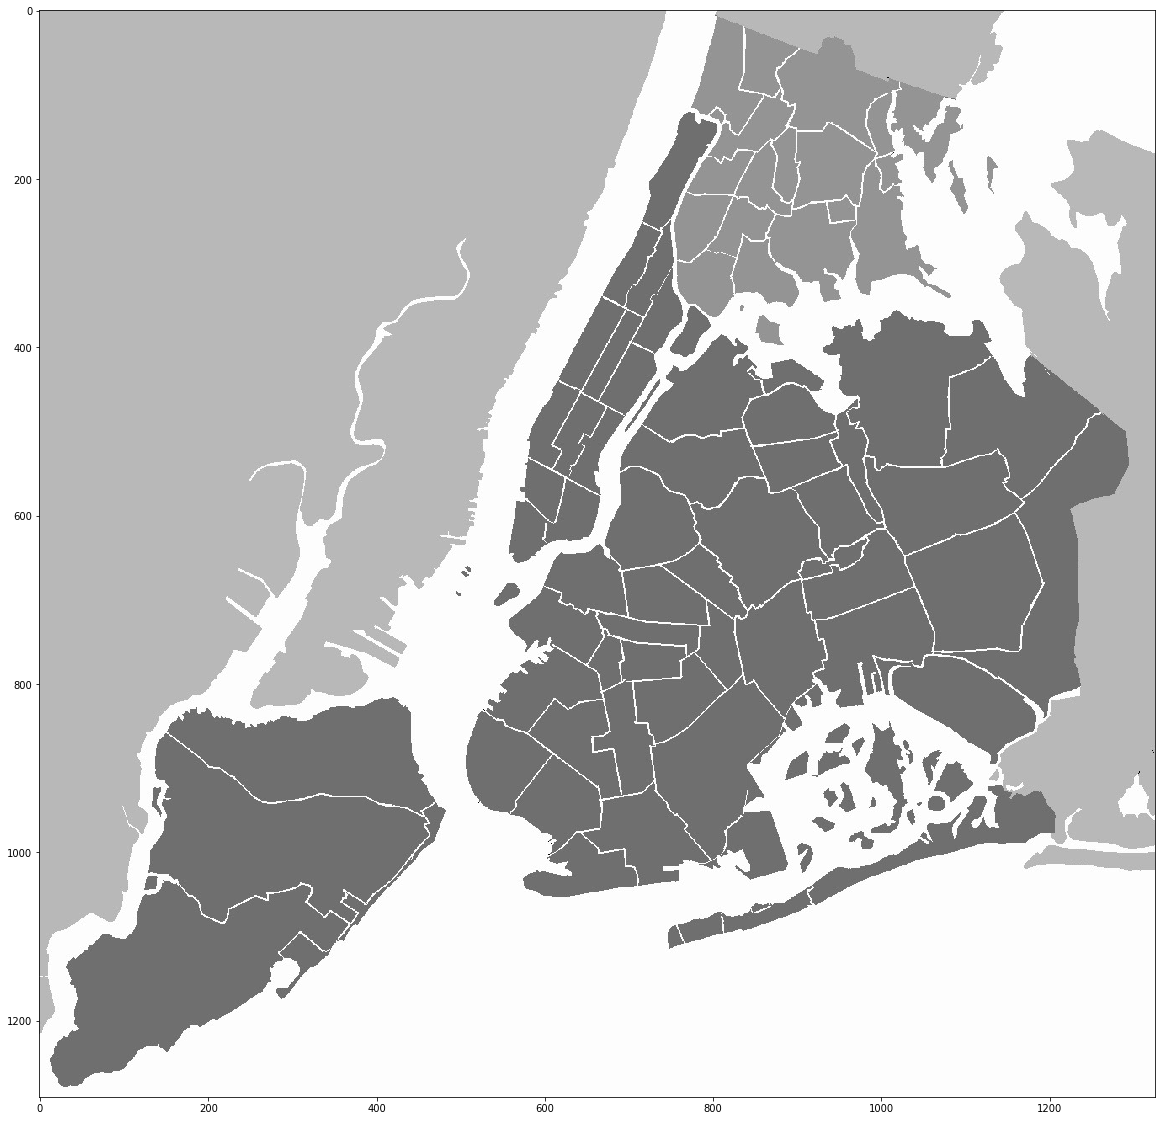

In [2]:
plt.figure(figsize=(20,20))
plt.imshow(Img)
plt.show()

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [5]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df = data['price'].groupby(data['neighbourhood_group'])
df.describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.496792,106.709349,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.383207,186.873538,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.875814,291.383183,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


## <font color=#00008b>各城市區域的建築數及平均房價</font>

In [7]:
data[['neighbourhood_group', 'room_type', 'price']].head()

,neighbourhood_group,room_type,price
0,Brooklyn,Private room,149
1,Manhattan,Entire home/apt,225
2,Manhattan,Private room,150
3,Brooklyn,Entire home/apt,89
4,Manhattan,Entire home/apt,80


In [8]:
data[['neighbourhood_group', 'room_type', 'price']].sort_values(by=['neighbourhood_group', 'room_type', 'price'],
                                                                ascending=[True, True, False]).head()

,neighbourhood_group,room_type,price
48282,Bronx,Entire home/apt,1000
38433,Bronx,Entire home/apt,670
48310,Bronx,Entire home/apt,600
16607,Bronx,Entire home/apt,500
34709,Bronx,Entire home/apt,475


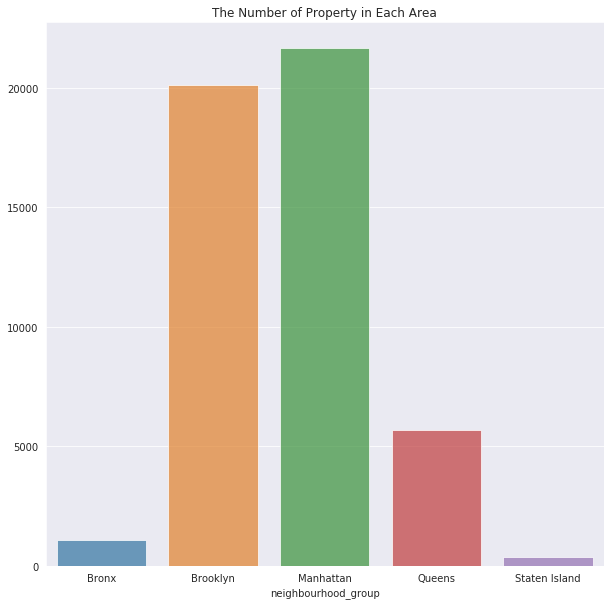

In [9]:
df_count = df.count()
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(10,10))
    sns.barplot(df_count.index, df_count.values, alpha=0.7)
    plt.title('The Number of Property in Each Area')

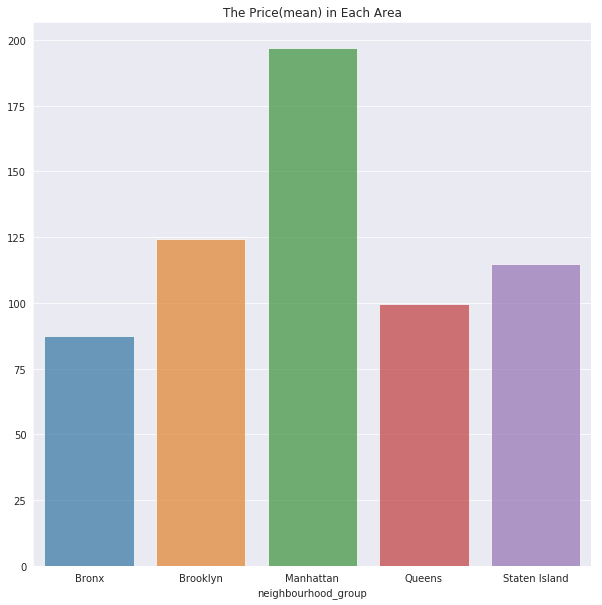

In [10]:
df_mean = df.mean()
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(10,10))
    sns.barplot(df_mean.index, df_mean.values, alpha=0.7)
    plt.title('The Price(mean) in Each Area')

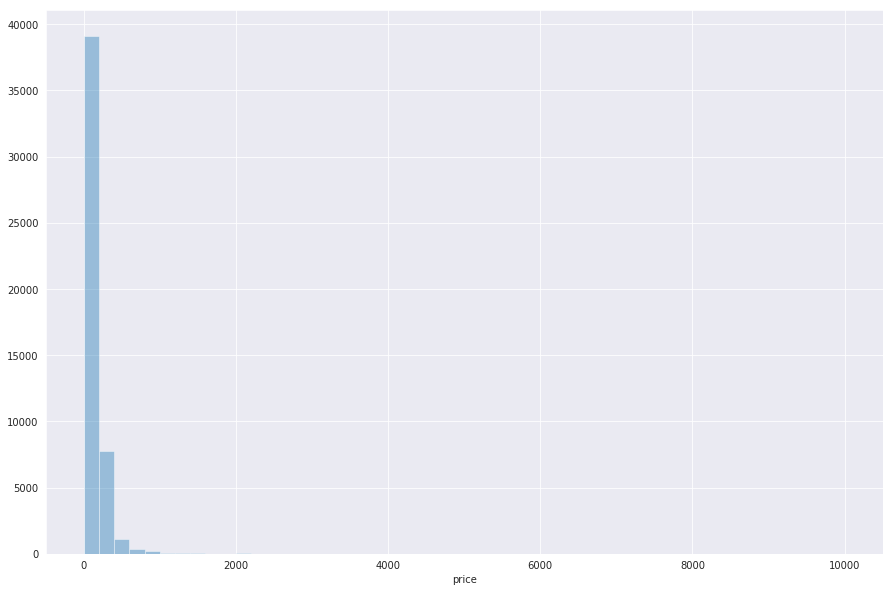

In [11]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(15,10))
    sns.distplot(data['price'], kde=False)

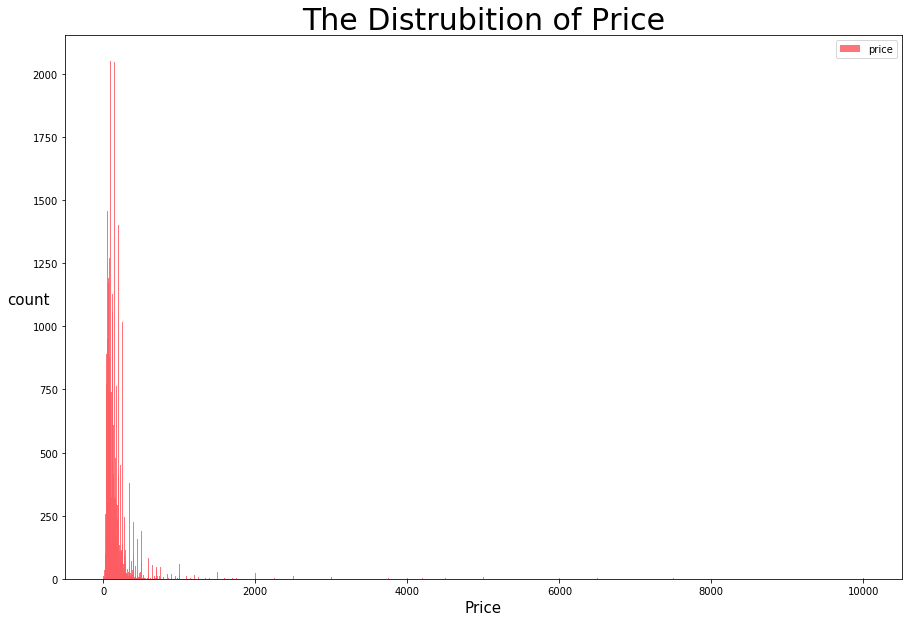

In [12]:
#上面那張的細化條狀圖(我畫爽的)
p = data['price'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(15,10)
plt.bar(p.index, p, width=10, label='price', color='#fd5c63', alpha=0.85)

axes.set_xlabel('Price', fontsize=15)
axes.set_ylabel('count', rotation=0, fontsize=15)
axes.set_title('The Distrubition of Price', fontsize=30)
axes.legend(loc='best')

z = np.log(data[data['price']>0]['price']) #取log後的常態分佈圖，先不用。
sns.distplot(z, kde=False)

In [13]:
g = data.groupby(['neighbourhood_group', 'room_type'])['price'].count().unstack()
g

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


Text(0.5, 1.0, 'room_type of Each Area')

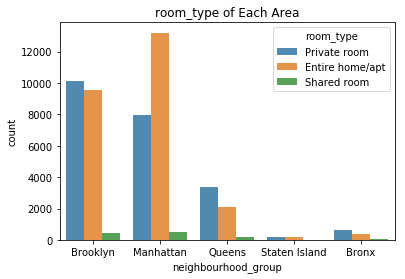

In [14]:
sns.countplot(data['neighbourhood_group'], hue=data['room_type'], alpha=0.85)
plt.title('room_type of Each Area')

[Text(0.5, 0, ''), Text(0.5, 1.0, 'Room_type in Staten Island')]

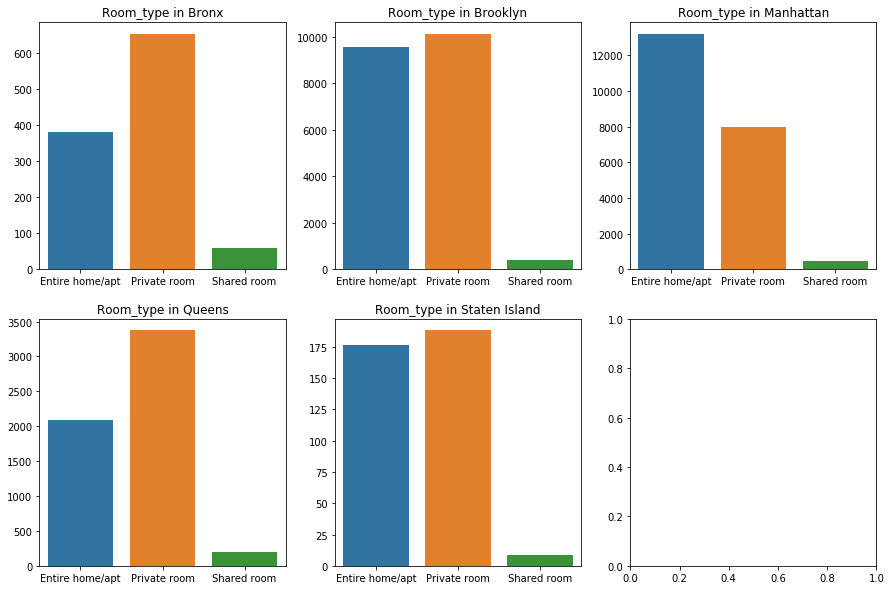

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(15,10)

sns.barplot(x=g.loc['Bronx'].index, y=g.loc['Bronx'].values, ax=axes[0,0])
sns.barplot(x=g.loc['Brooklyn'].index, y=g.loc['Brooklyn'].values, ax=axes[0,1])
sns.barplot(x=g.loc['Manhattan'].index, y=g.loc['Manhattan'].values, ax=axes[0,2])
sns.barplot(x=g.loc['Queens'].index, y=g.loc['Queens'].values, ax=axes[1,0])
sns.barplot(x=g.loc['Staten Island'].index, y=g.loc['Staten Island'].values, ax=axes[1,1])

axes[0,0].set(xlabel=None, title="Room_type in Bronx")
axes[0,1].set(xlabel=None, title="Room_type in Brooklyn")
axes[0,2].set(xlabel=None, title="Room_type in Manhattan")
axes[1,0].set(xlabel=None, title="Room_type in Queens")
axes[1,1].set(xlabel=None, title="Room_type in Staten Island")

## <font color=#00008b>推測特徵</font>
>**'id - '**　上市ＩＤ，應該不重要<br />
**'name - '**　上市名字，下面這三個特別有趣，互相有關係但不確定是否影響房價<br />
**'host_id - '**　主人ＩＤ，持有複數物件的所有人<br />
**'host_name - '**　主人名，但有些人名字一樣，看ＩＤ會比較準<br />
**'neighbourhood_group - '**　最直接關係房價的地區<br />
**'neighbourhood - '**　地區細分<br />
**'latitude - '**　經緯度，不考慮。用地區就好了（經緯度大家都差不多<br />
**'longitude - '**　同上<br />
**'room_type - '**　房型，列入考慮。<br />
**'price - '**　推測目標。<br />
**'minimum_nights - '**　這個我不知道是甚麼，最少居住日嗎．．．<br />
**'number_of_reviews - '**　網站用的<br />
**'last_review - '**　網站用的<br />
**'reviews_per_month - '**　網站用的<br />
**'calculated_host_listings_count - '**　主人持有物件數，影響主人ＩＤ物件取向，用主人ID就好<br />
**'availability_365 - '**　訂房總天數<br />

In [16]:
feature_take = pd.DataFrame({'Variable':data.columns,
              'Important':(0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0),
              'dType':('int','obj','int','obj','obj','obj','float','float','obj','int','int','int','obj','float','int','int')
             })
feature_take.set_index('Variable')

,Important,dType
Variable,,
id,0,int
name,0,obj
host_id,1,int
host_name,0,obj
neighbourhood_group,1,obj
neighbourhood,1,obj
latitude,0,float
longitude,0,float
room_type,1,obj


In [17]:
data2 = data.copy()

In [18]:
pd.get_dummies(data2['neighbourhood_group'], prefix='neighbourhood_group').head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [19]:
one_hot = pd.get_dummies(data2['neighbourhood_group'], prefix='neighbourhood_group')
data2 = data2.drop('neighbourhood_group', 1)
data2 = pd.concat([data2,one_hot], 1)

In [20]:
#試著寫了函式，但並不成功只好手動one-hot-encoding
one_hot = pd.get_dummies(data2['room_type'], prefix='room_type')
data2 = data2.drop('room_type', 1)
data2 = pd.concat([data2,one_hot], 1)

In [21]:
look = data2.columns
for x in look:
    if data2[x].dtype == 'object':
        data2[x] = data2[x].astype('category').cat.codes
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


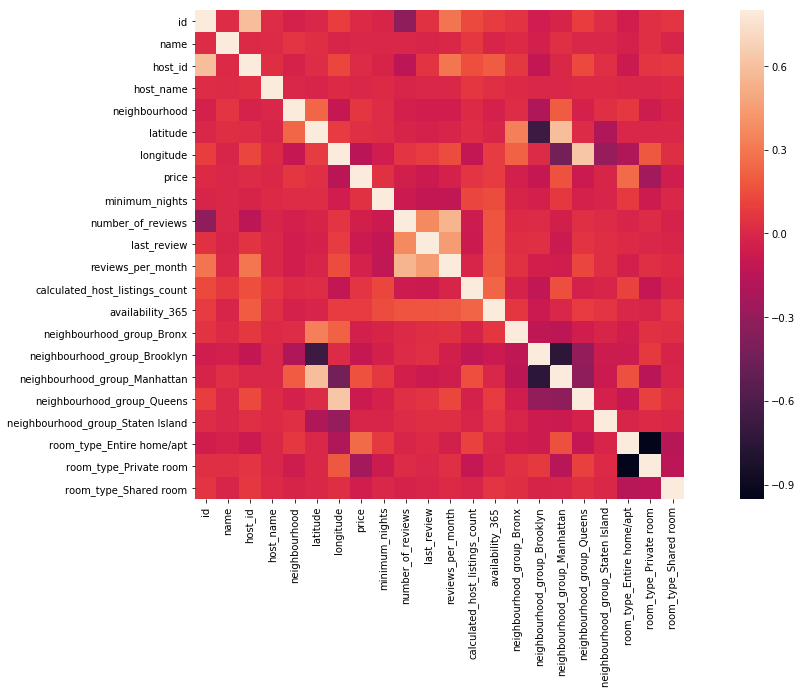

In [22]:
corrmat = data2.corr()
f, ax = plt.subplots(figsize=(20,9))
sns.heatmap(corrmat, vmax=0.8, square=True)

In [23]:
corrmat['price']

id                                   0.010619
name                                -0.006208
host_id                              0.015309
host_name                            0.001563
neighbourhood                        0.062057
latitude                             0.033939
longitude                           -0.150019
price                                1.000000
minimum_nights                       0.042799
number_of_reviews                   -0.047954
last_review                         -0.079094
reviews_per_month                   -0.030608
calculated_host_listings_count       0.057472
availability_365                     0.081829
neighbourhood_group_Bronx           -0.041030
neighbourhood_group_Brooklyn        -0.098603
neighbourhood_group_Manhattan        0.163976
neighbourhood_group_Queens          -0.080205
neighbourhood_group_Staten Island   -0.013840
room_type_Entire home/apt            0.255857
room_type_Private room              -0.240246
room_type_Shared room             

## <font color=#00008b>資料前處理</font>

In [24]:
data.isnull().sum() #觀察缺值

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [25]:
df_p = data[['number_of_reviews', 'last_review', 'reviews_per_month']]
df_p[df_p['last_review'].isnull()].tail()
#一看發現不是閱覽資料遺失，而是從一開始就沒被閱覽阿(沒有人看你哭哭喔

,number_of_reviews,last_review,reviews_per_month
48890,0,NaN,NaN
48891,0,NaN,NaN
48892,0,NaN,NaN
48893,0,NaN,NaN
48894,0,NaN,NaN


In [26]:
data['last_review'] = data['last_review'].fillna('x')
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

In [27]:
#name的關係度太低，隨意填值即可
#host_name基本上是綁定host_id的，如果沒有已知再隨意填值就好了
num = data[data['host_name'].isnull()].index
data.loc[num] #確定每個host_name都是獨立的遺失值

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,x,0.00,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,x,0.00,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0


In [28]:
#因為不希望這些相異的遺失值一樣，所以比起fillna用了原始的for迴圈去指定
#不知道有沒有類似的功能，往後再查查
for n in num:
    data['host_name'][n] = 'NoName_'+str(n)
data.loc[num].tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
28042,21901156,Best Deal! Lovely place in Manhattan! Time Squ...,159156636,NoName_28042,Manhattan,Hell's Kitchen,40.75656,-73.99063,Private room,120,1,109,2019-01-01,5.97,3,0
28274,21990808,***SLEEPING IN THE GOLDEN PLACE***,159156636,NoName_28274,Manhattan,Hell's Kitchen,40.75835,-73.99065,Private room,120,1,88,2018-12-14,4.93,3,0
30570,23660605,Private Bedroom w/ Balcony view of Central Park,177146433,NoName_30570,Manhattan,East Harlem,40.79766,-73.94824,Private room,139,1,6,2018-08-12,0.46,1,0
32193,25180572,Beautiful Cozy Studio Apt. UWS,119609345,NoName_32193,Manhattan,Upper West Side,40.77701,-73.97667,Entire home/apt,180,4,0,x,0.00,1,0
38992,30468335,LARGE Prospect Lefferts Gardens Bedroom,228750026,NoName_38992,Brooklyn,Flatbush,40.65152,-73.95271,Private room,55,7,0,x,0.00,1,69


In [29]:
#name同理進行補值
num = data[data['name'].isnull()].index
for n in num:
    data['name'][n] = 'NoName'+str(n)

In [31]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## <font color=#00008b>檢測Model</font>

In [37]:
#補上正式版的one-hot-encoding
one_hot = pd.get_dummies(data['neighbourhood_group'], prefix='neighbourhood_group')
data = data.drop('neighbourhood_group', 1)
data = pd.concat([data, one_hot], 1)

one_hot = pd.get_dummies(data['room_type'], prefix='room_type')
data = data.drop('room_type', 1)
data = pd.concat([data, one_hot], 1)

In [44]:
#資料轉換數值
look = data.columns
for x in look:
    if data[x].dtype == 'object':
        data[x] = data[x].astype('category').cat.codes
data.head(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,12328,2787,4989,108,40.64749,-73.97237,149,1,9,...,6,365,0,1,0,0,0,0,1,0
1,2595,37471,2845,4785,127,40.75362,-73.98377,225,1,45,...,2,355,0,0,1,0,0,1,0,0
2,3647,43559,4632,2909,94,40.80902,-73.94190,150,3,0,...,1,365,0,0,1,0,0,0,1,0


In [91]:
a = list(data.columns)
a.remove('price')
a

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood',
 'latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'neighbourhood_group_Bronx',
 'neighbourhood_group_Brooklyn',
 'neighbourhood_group_Manhattan',
 'neighbourhood_group_Queens',
 'neighbourhood_group_Staten Island',
 'room_type_Entire home/apt',
 'room_type_Private room',
 'room_type_Shared room']

In [112]:
#切分train與test組 7:3
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[a], data['price'], test_size=0.3, random_state=0)

In [113]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=1000, random_state=42)
rfModel.fit(x_train, y_train)

preds = rfModel.predict(x_test)
preds

array([457.578, 424.309, 210.243, ..., 100.168, 381.893, 199.062])

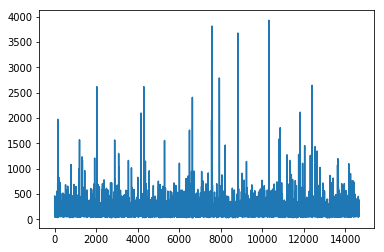

In [126]:
plt.plot(preds)

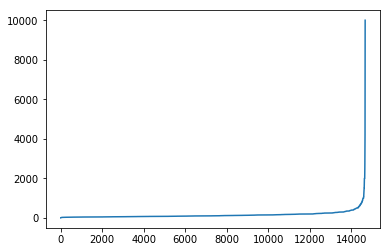

In [130]:
plt.plot(sorted(y_test))

In [150]:
t1 = pd.Series(preds)
y_test.index = np.arange(len(y_test))
pd.concat([t1,y_test], 1)
#差太大了...

,0,price
0,457.578,225
1,424.309,649
2,210.243,300
3,46.797,26
4,111.683,125
5,54.743,49
6,113.663,100
7,111.472,175
8,116.894,85
9,73.544,70
